In [2]:
import pandas as pd
import os

Figueroadata = pd.read_excel(os.path.join("graphdata","dataFigueroa.xlsx"),
                          index_col=0) 

In [3]:
varsToDrop=['Multinacional']
adjacency=Figueroadata.drop(varsToDrop,axis=1)

In [4]:
import networkx as nx

In [5]:
elitered = nx.from_pandas_adjacency(adjacency)

In [6]:
#noded
len(elitered)

37

In [7]:
#edges
elitered.size()

172

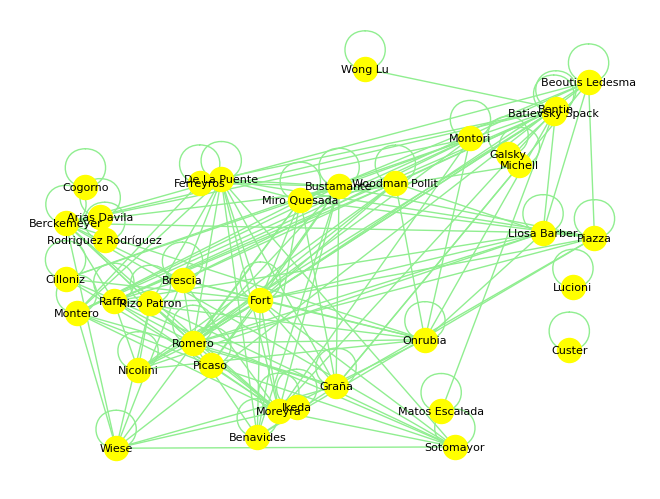

In [8]:
# plot
nx.draw_random(elitered,
                node_color='yellow',
                edge_color='lightgreen',
                with_labels=True,
                font_size=8)

In [9]:
elitered.remove_edges_from(nx.selfloop_edges(elitered))

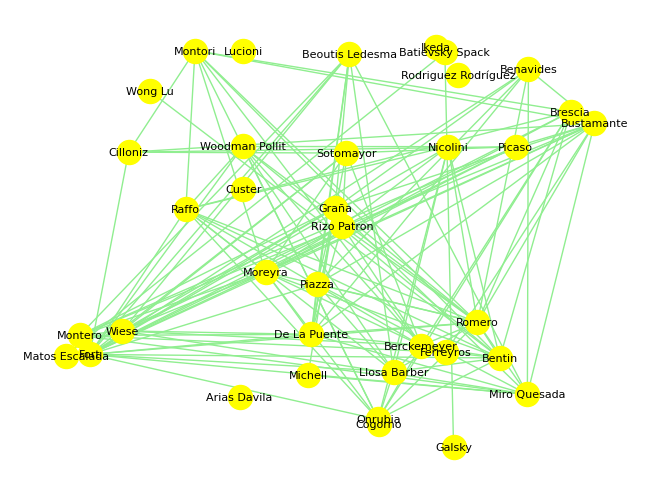

In [10]:
nx.draw_random(elitered,
                node_color='yellow',
                edge_color='lightgreen',
                with_labels=True,
                font_size=8)

In [11]:
Figueroadata['Multinacional'].head()

Romero          1
Graña           1
Miro Quesada    1
Moreyra         1
Fort            1
Name: Multinacional, dtype: int64

In [12]:
elitered.nodes.data()

NodeDataView({'Romero': {}, 'Graña': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodríguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

In [13]:
dict(zip(Figueroadata.index,Figueroadata['Multinacional']))

{'Romero': 1,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodríguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

In [14]:
attributeToAdd=dict(zip(Figueroadata.index,Figueroadata['Multinacional']))
nx.set_node_attributes(elitered, attributeToAdd,'multi')

In [15]:
colors={e:'pink' if v==1 else 'red' for e,v in nx.get_node_attributes(elitered,"multi").items()}
nx.set_node_attributes(elitered, colors, "color")

In [16]:
elitered.nodes.data()

NodeDataView({'Romero': {'multi': 1, 'color': 'pink'}, 'Graña': {'multi': 1, 'color': 'pink'}, 'Miro Quesada': {'multi': 1, 'color': 'pink'}, 'Moreyra': {'multi': 1, 'color': 'pink'}, 'Fort': {'multi': 1, 'color': 'pink'}, 'De La Puente': {'multi': 1, 'color': 'pink'}, 'Wiese': {'multi': 1, 'color': 'pink'}, 'Onrubia': {'multi': 1, 'color': 'pink'}, 'Brescia': {'multi': 1, 'color': 'pink'}, 'Nicolini': {'multi': 1, 'color': 'pink'}, 'Montero': {'multi': 1, 'color': 'pink'}, 'Picaso': {'multi': 1, 'color': 'pink'}, 'Bentin': {'multi': 1, 'color': 'pink'}, 'Benavides': {'multi': 1, 'color': 'pink'}, 'Bustamante': {'multi': 1, 'color': 'pink'}, 'Woodman Pollit': {'multi': 1, 'color': 'pink'}, 'Raffo': {'multi': 1, 'color': 'pink'}, 'Piazza': {'multi': 1, 'color': 'pink'}, 'Berckemeyer': {'multi': 0, 'color': 'red'}, 'Llosa Barber': {'multi': 1, 'color': 'pink'}, 'Beoutis Ledesma': {'multi': 1, 'color': 'pink'}, 'Rizo Patron': {'multi': 1, 'color': 'pink'}, 'Montori': {'multi': 1, 'color':

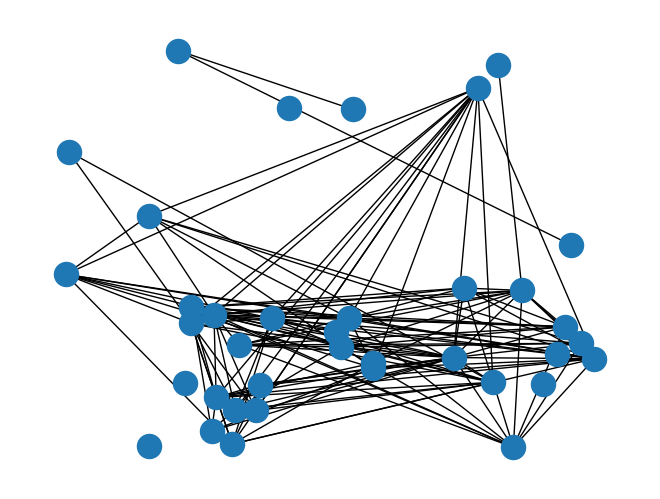

In [17]:
nx.draw_random(elitered)

In [18]:
from pyvis.network import Network

In [19]:
from IPython.core.display import display, HTML

C:\Users\Charles\AppData\Local\Temp\ipykernel_11232\2058709175.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [20]:
Gnew = Network('500px', '500px', notebook=True, cdn_resources='remote')
Gnew.from_nx(elitered.copy())
Gnew.show('Gnew.html')

Gnew.html


In [21]:
for node in elitered.nodes(data=True):
    Gnew.get_node(node[0])['color'] = node[1]['color']

In [22]:
with open('Gnew.html', 'r') as f:
    html_content = f.read()
display(HTML(html_content))

In [23]:
print(nx.get_node_attributes(elitered, 'multi'))
print(nx.get_node_attributes(elitered, 'color'))

{'Romero': 1, 'Graña': 1, 'Miro Quesada': 1, 'Moreyra': 1, 'Fort': 1, 'De La Puente': 1, 'Wiese': 1, 'Onrubia': 1, 'Brescia': 1, 'Nicolini': 1, 'Montero': 1, 'Picaso': 1, 'Bentin': 1, 'Benavides': 1, 'Bustamante': 1, 'Woodman Pollit': 1, 'Raffo': 1, 'Piazza': 1, 'Berckemeyer': 0, 'Llosa Barber': 1, 'Beoutis Ledesma': 1, 'Rizo Patron': 1, 'Montori': 1, 'Sotomayor': 1, 'Cilloniz': 1, 'Ferreyros': 0, 'Michell': 0, 'Wong Lu': 1, 'Batievsky Spack': 1, 'Matos Escalada': 1, 'Galsky': 0, 'Lucioni': 0, 'Rodriguez Rodríguez': 1, 'Custer': 0, 'Ikeda': 0, 'Cogorno': 0, 'Arias Davila': 1}
{'Romero': 'pink', 'Graña': 'pink', 'Miro Quesada': 'pink', 'Moreyra': 'pink', 'Fort': 'pink', 'De La Puente': 'pink', 'Wiese': 'pink', 'Onrubia': 'pink', 'Brescia': 'pink', 'Nicolini': 'pink', 'Montero': 'pink', 'Picaso': 'pink', 'Bentin': 'pink', 'Benavides': 'pink', 'Bustamante': 'pink', 'Woodman Pollit': 'pink', 'Raffo': 'pink', 'Piazza': 'pink', 'Berckemeyer': 'red', 'Llosa Barber': 'pink', 'Beoutis Ledesma':

In [24]:
os.makedirs("graphdata", exist_ok=True)

In [25]:
nx.write_gml(elitered, os.path.join("graphdata", "elitered.gml"))